**Problem - 1: Perform a classification task with knn from scratch.**

In [3]:
#importing pandas
import pandas as pd

#Loading the dataset
df = pd.read_csv("diabetes.csv")

#Printing first few rows
print("The first few rows of the data is:")
print()
print(df.head())
print()

print("\nDataset Information:")
print()
print(df.info())
print()

print("\nSummary Statistics:")
print()
print(df.describe())  # Summary statistics for numerical columns
print()

# Check for missing values
print("\nMissing Values:")
print()
print(df.isnull().sum())
print()



The first few rows of the data is:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies             

Feature Engineering:

In [4]:
#importing pandas
import pandas as pd
import numpy as np

#Loading the dataset
df = pd.read_csv("diabetes.csv")

# Separate features (X) and target (y)
X = df.drop(columns=['Outcome']).values # Convert features to NumPy array
y = df['Outcome'].values # Convert target to NumPy array

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3,random_seed=42)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


Computing Euclidean Distance Metrics:

In [5]:
def euclidean_distance(point1, point2):
    # Ensure inputs are numeric arrays
    if not (np.issubdtype(point1.dtype, np.number) and np.issubdtype(point2.dtype, np.number)):
        raise ValueError("Both inputs must be numeric arrays.")

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance


In [6]:
try:
    # Define two points
    point1 = np.array([3, 4], dtype=float)
    point2 = np.array([0, 0], dtype=float)

    # Calculate the distance
    result = euclidean_distance(point1, point2)

    # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")

except ValueError as ve:
    print(f"ValueError: {ve}")

except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


Implementation of core k-NN algorithm:

In [7]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [8]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)



In [9]:

try:
    # Define the test set for the test case
    X_test_sample = X_test[:5]  # Taking a small subset for testing
    y_test_sample = y_test[:5]  # Corresponding labels for the subset

    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    # Print test results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    # Check if predictions match expected format
    assert predictions.shape == y_test_sample.shape, \
        "The shape of predictions does not match the shape of the actual labels."

    print("Test case passed successfully!")

except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


Computing Accuracy:

In [10]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


Experimentation:

Running experiment for original dataset...
Accuracy for k=1: 68.70%, Time taken: 1.2249 seconds
Accuracy for k=2: 72.61%, Time taken: 1.2228 seconds
Accuracy for k=3: 67.39%, Time taken: 1.2174 seconds
Accuracy for k=4: 72.17%, Time taken: 1.6079 seconds
Accuracy for k=5: 68.70%, Time taken: 2.0330 seconds
Accuracy for k=6: 70.00%, Time taken: 1.3935 seconds
Accuracy for k=7: 69.13%, Time taken: 1.2415 seconds
Accuracy for k=8: 71.30%, Time taken: 1.2067 seconds
Accuracy for k=9: 70.00%, Time taken: 1.2223 seconds
Accuracy for k=10: 71.74%, Time taken: 1.1825 seconds
Accuracy for k=11: 73.04%, Time taken: 1.1971 seconds
Accuracy for k=12: 73.91%, Time taken: 1.1822 seconds
Accuracy for k=13: 74.35%, Time taken: 1.1953 seconds
Accuracy for k=14: 72.61%, Time taken: 1.6273 seconds
Accuracy for k=15: 73.91%, Time taken: 2.0334 seconds
Running experiment for scaled dataset...
Accuracy for k=1: 63.48%, Time taken: 1.2796 seconds
Accuracy for k=2: 66.09%, Time taken: 1.2271 seconds
Accuracy 

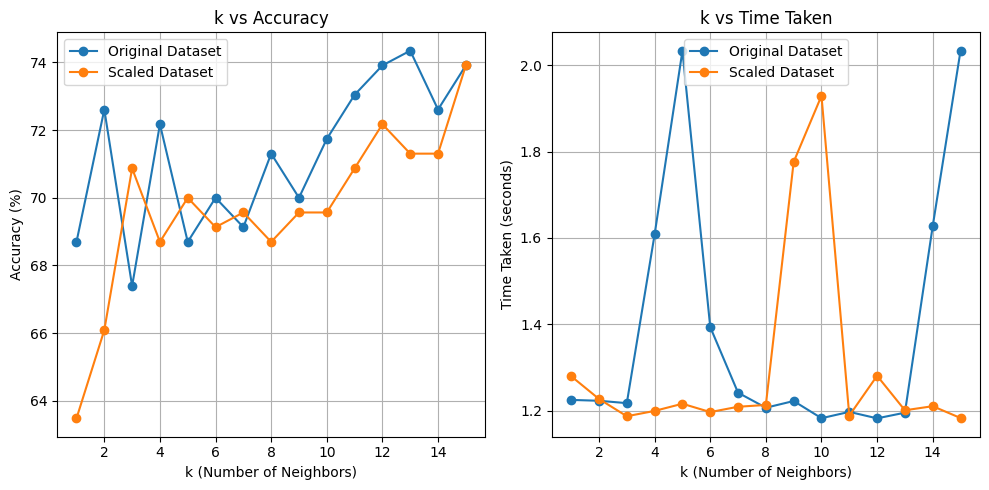

In [13]:
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

# Assuming knn_predict and compute_accuracy are already defined elsewhere in your code.

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}
    runtimes = {}
    for k in k_values:
        start_time = time.time()  # Start timer
        predictions = knn_predict(X_test, X_train, y_train, k)
        runtime = time.time() - start_time  # Measure runtime
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        runtimes[k] = runtime
        print(f"Accuracy for k={k}: {accuracy:.2f}%, Time taken: {runtime:.4f} seconds")

    return accuracies, runtimes

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of k values to experiment with
k_values = range(1, 16)

# Run the experiment for the original dataset
print("Running experiment for original dataset...")
accuracies_original, runtimes_original = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)

# Run the experiment for the scaled dataset
print("Running experiment for scaled dataset...")
accuracies_scaled, runtimes_scaled = experiment_knn_k_values(X_train_scaled, y_train, X_test_scaled, y_test, k_values)

# Plot accuracy vs k for original and scaled datasets
plt.figure(figsize=(10, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, list(accuracies_original.values()), marker='o', label='Original Dataset')
plt.plot(k_values, list(accuracies_scaled.values()), marker='o', label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)

# Time Taken Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, list(runtimes_original.values()), marker='o', label='Original Dataset')
plt.plot(k_values, list(runtimes_scaled.values()), marker='o', label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)

plt.tight_layout()
print()
print("Problem 2: Comparative Analysis:")
print("Scaling:")
print("Accuracy:\nOriginal dataset: Accuracy varies from 67.39% to 74.35%, with the highest accuracy at 𝑘=13(74.35%).")
print("Scaled dataset: Accuracy ranges from 63.48% to 73.91%, with the highest accuracy at k=15 (73.91%).")
print("Time Taken:")
print("For the original dataset, time was higher for k=2 and k=12.")
print("For the scaled dataset,time was noticeably increased at k=6 and k=7.")
print()
print("Lower k values (e.g. k=1,3) show lower accuracy, as the model overfits to individual data points, including noise. \nAccuracy improves with higher k values, peaking at k=13 for the original dataset and k=15 for the scaled dataset. \nBeyond this, accuracy may stabilize or slightly decrease due to underfitting.")
print("Lower values of k require fewer distance computations and sorting, resulting in lower time costs whereas Higher k values slightly increase computational cost due to more distance computations")
print("For the original dataset, the highest accuracy of 74.35% is achieved at k=13 with a moderate time cost of 1.3507 seconds. \nFor the scaled dataset, the highest accuracy of 73.91% is achieved at k=15 with a time cost of 1.1832 seconds.")